# EMPLOYEE ATTRITION IN HEALTHCARE INDUSTRY

Employee attrition happens when the size of workforce diminishes over time, through any method, including voluntary resignations, layoffs, failure to return from a leave of absence, or even illness or death. Whenever anyone ceases working for the company for any reason and is not replaced for a long time (if ever), that would be employee attrition. This means that employees are leaving faster than they are hired.

Challenges that an organization has to face due employee attrition are:

Expensive in terms of both money and time to train new employees. Loss of experienced employees impact on productivity and can happen for several reasons. These include unhappiness about benefits or the pay structure, a lack of development opportunities, and even poor conditions in the workplace. In this project, we want to look for about employee attrition's problems.

#### Employee Attrition Dataset
Source: Kaggle

Data: IBM HR Analytics dataset (synthetically generated) https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare

#### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Read and check file

In [2]:
watson_healthcare = pd.read_csv('raw_watson_healthcare.csv')
watson_healthcare.head()
watson_healthcare.tail()

,EmployeeID,Age,Attrition,BUSINESSTravel,DailyRate,department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,Total Working Years,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1683,1117656.0,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80.0,0,1,3,1,1,0,0,0
1684,1152327.0,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80.0,1,15,3,3,3,2,1,2
1685,1812428.0,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80.0,0,1,0,4,1,0,0,0
1686,1812429.0,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80.0,1,21,3,3,21,6,11,8
1687,1152329.0,27,No,Travel_Rarely,511,Cardiology,2,2,Medical,1,...,2,80.0,0,9,5,2,8,7,0,7


### Overview

In [3]:
watson_healthcare.info()
watson_healthcare.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1685 non-null   float64
 1   Age                       1688 non-null   int64  
 2   Attrition                 1688 non-null   object 
 3   BUSINESSTravel            1688 non-null   object 
 4   DailyRate                 1688 non-null   int64  
 5    department               1687 non-null   object 
 6   DistanceFromHome          1688 non-null   int64  
 7   Education                 1688 non-null   int64  
 8   EducationField            1686 non-null   object 
 9   EmployeeCount             1688 non-null   int64  
 10  EnvironmentSatisfaction   1688 non-null   int64  
 11  gender                    1688 non-null   object 
 12  HourlyRate                1677 non-null   float64
 13  JobInvolvement            1688 non-null   int64  
 14  JobLevel

(1688, 35)

### Exploratory Data Analysis

In [4]:
watson_healthcare.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,Total Working Years,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.685000e+03,1688.000000,1688.000000,1688.000000,1688.000000,1688.0,1688.000000,1677.000000,1688.000000,1688.000000,...,1688.000000,1681.0,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,1.457708e+06,36.870261,802.318128,9.235190,2.906398,1.0,2.715047,65.462135,2.725118,2.069313,...,2.719787,80.0,0.810427,11.333531,2.803910,2.766588,7.032583,4.263033,2.190166,4.138626
std,2.487653e+05,9.127711,401.396683,8.168485,1.024655,0.0,1.095861,20.186376,0.712516,1.112757,...,1.077456,0.0,0.859183,7.819739,1.292469,0.701440,6.087546,3.621645,3.221147,3.559767
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235953e+06,30.000000,465.750000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.467266e+06,36.000000,798.500000,7.000000,3.000000,1.0,3.000000,65.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.668404e+06,43.000000,1157.250000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Null check

In [5]:
watson_healthcare.isnull().sum()

EmployeeID                   3
Age                          0
Attrition                    0
BUSINESSTravel               0
DailyRate                    0
 department                  1
DistanceFromHome             0
Education                    0
EducationField               2
EmployeeCount                0
EnvironmentSatisfaction      0
gender                       0
HourlyRate                  11
JobInvolvement               0
JobLevel                     0
Job role                     1
JobSatisfaction              0
MaritalStatus                1
MonthlyIncome                0
monthly rate                 0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                7
Shift                        0
Total Working Years          0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

#### Duplicated rows check

In [6]:
watson_healthcare.duplicated().sum()

11

#### Sub_categories check

In [7]:
watson_healthcare['BUSINESSTravel'].value_counts()
watson_healthcare['Attrition'].value_counts()
watson_healthcare['EducationField'].value_counts()
watson_healthcare[' department'].value_counts()

Maternity     795
Cardiology    534
Neurology     354
cardiology      1
maternity       1
 Maternity      1
neurology       1
Name:  department, dtype: int64

## Cleaning Data
#### Delete Null

In [8]:
watson_healthcare.dropna(inplace=True)
watson_healthcare.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BUSINESSTravel              0
DailyRate                   0
 department                 0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
Job role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
monthly rate                0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
Total Working Years         0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Delete Duplicated rows

In [9]:
watson_healthcare.drop_duplicates(inplace=True)
watson_healthcare.duplicated().sum()

0

#### Check Columns names and remove unused columns

In [10]:
watson_healthcare.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BUSINESSTravel', 'DailyRate',
       ' department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'Job role', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'monthly rate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'Total Working Years', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
cat_cols=watson_healthcare.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(watson_healthcare[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(cat_df)

count
column         value                    
 department    neurology               1
               maternity               1
               cardiology              1
                Maternity              1
               Neurology             345
               Cardiology            518
               Maternity             784
Attrition      Yes                   194
               No                   1457
BUSINESSTravel  Travel_Frequently      1
               Rarely                  9
               Non-Travel            168
               Travel_Frequently     315
               Travel_Rarely        1158
EducationField  Other                  1
                Technical Degree       1
                Life Sciences          2
               Human Resources        29
               Other                  85
               Technical Degree      144
               Marketing             184
               Medical               518
               Life Sciences         687
Job role       Admin                  16
               Administrative        114
               Therapist             187
               Other                 528
               Nurse                 806
MaritalStatus  Divorced              373
               Single                509
               Married               769
Over18         Y                    1651
OverTime       Yes                   470
               No                   1181
gender          Female                 1
                Male                   3
               Female                663
               Male                  984

We are going to delete columns by some reasons
- Column EmployeeID has no contribution to this analysis.
- Column Over18 have its values are Yes at all rows.
- Column EmployeeCount have all value 1 in its rows.
- Column StandardHour have all same value 80 in its rows.

In [12]:
removed_cols = watson_healthcare[['Over18','EmployeeID', 'EmployeeCount', 'StandardHours']]
watson_healthcare.drop(removed_cols, inplace=True, axis=1)

#### Change dtype of Attrition Column

In [13]:
watson_healthcare['Attrition'] = watson_healthcare['Attrition'].str.replace('Yes',str(1))
watson_healthcare['Attrition'] = watson_healthcare['Attrition'].str.replace('No',str(0))
watson_healthcare['Attrition'] = watson_healthcare['Attrition'].astype('int')

Need 'int' type of Attrition for making correlation check with others

#### Correct Columns names

In [14]:
def col_fix(col):
    col = col.strip()
    col = col.replace('BUSINESSTravel', 'BusinessTravel')
    col = col.replace('department', 'Department')
    col = col.replace('gender', 'Gender')
    col = col.replace('Job role', 'JobRole')
    col = col.replace('monthly rate', 'MonthlyRate')
    col = col.replace('Total Working Years', 'TotalWorkingYears')
    return col

new_col_name = []
for text in watson_healthcare.columns:
    fix_text = col_fix(text)
    new_col_name.append(fix_text)

watson_healthcare.columns = new_col_name
watson_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1687
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1651 non-null   int64  
 1   Attrition                 1651 non-null   int32  
 2   BusinessTravel            1651 non-null   object 
 3   DailyRate                 1651 non-null   int64  
 4   Department                1651 non-null   object 
 5   DistanceFromHome          1651 non-null   int64  
 6   Education                 1651 non-null   int64  
 7   EducationField            1651 non-null   object 
 8   EnvironmentSatisfaction   1651 non-null   int64  
 9   Gender                    1651 non-null   object 
 10  HourlyRate                1651 non-null   float64
 11  JobInvolvement            1651 non-null   int64  
 12  JobLevel                  1651 non-null   int64  
 13  JobRole                   1651 non-null   object 
 14  JobSatis

#### Correct sub_categories names

In [15]:
watson_healthcare['BusinessTravel'].value_counts()
map_dict_business_travel = {
                            'Rarely':'Travel_Rarely',
                            ' Travel_Frequently':'Travel_Frequently',
                            'Travel_Rarely':'Travel_Rarely',
                            'Travel_Frequently':'Travel_Frequently',
                            'Non-Travel':'Non-Travel'
                            }
watson_healthcare['BusinessTravel'] = watson_healthcare['BusinessTravel'].map(map_dict_business_travel)
print(watson_healthcare['BusinessTravel'].value_counts())

Travel_Rarely        1167
Travel_Frequently     316
Non-Travel            168
Name: BusinessTravel, dtype: int64


In [16]:
watson_healthcare['Department'].value_counts()
map_dict_Department = {
                    'cardiology':'Cardiology',
                    ' Maternity':'Maternity',
                    'maternity':'Maternity',
                    'neurology':'Neurology',
                    'Maternity':'Maternity',
                    'Cardiology':'Cardiology',
                    'Neurology':'Neurology'
                        }
watson_healthcare['Department'] = watson_healthcare['Department'].map(map_dict_Department)
print(watson_healthcare['Department'].value_counts())

Maternity     786
Cardiology    519
Neurology     346
Name: Department, dtype: int64


In [17]:
watson_healthcare.loc[watson_healthcare['EducationField'] == ' Life Sciences', 'EducationField'] = 'Life Sciences'
watson_healthcare['EducationField'].value_counts()

watson_healthcare.loc[watson_healthcare['EducationField'] == ' Other', 'EducationField'] = 'Other'
watson_healthcare['EducationField'].value_counts()

watson_healthcare.loc[watson_healthcare['EducationField'] == ' Technical Degree', 'EducationField'] = 'Technical Degree'
watson_healthcare['EducationField'].value_counts()

Life Sciences       689
Medical             518
Marketing           184
Technical Degree    145
Other                86
Human Resources      29
Name: EducationField, dtype: int64

In [18]:
watson_healthcare['Gender'].value_counts()
map_dict_gender = {
                    ' Male':'Male',
                    ' Female':'Female',
                    'Male':'Male',
                    'Female':'Female'
                    }
watson_healthcare['Gender'] = watson_healthcare['Gender'].map(map_dict_gender)
print(watson_healthcare['Gender'].value_counts())

Male      987
Female    664
Name: Gender, dtype: int64


In [19]:
watson_healthcare.loc[watson_healthcare['JobRole'] == 'Admin', 'JobRole'] = 'Administrative'
watson_healthcare['JobRole'].value_counts()

Nurse             806
Other             528
Therapist         187
Administrative    130
Name: JobRole, dtype: int64

#### Final check data

In [20]:
watson_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1687
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1651 non-null   int64  
 1   Attrition                 1651 non-null   int32  
 2   BusinessTravel            1651 non-null   object 
 3   DailyRate                 1651 non-null   int64  
 4   Department                1651 non-null   object 
 5   DistanceFromHome          1651 non-null   int64  
 6   Education                 1651 non-null   int64  
 7   EducationField            1651 non-null   object 
 8   EnvironmentSatisfaction   1651 non-null   int64  
 9   Gender                    1651 non-null   object 
 10  HourlyRate                1651 non-null   float64
 11  JobInvolvement            1651 non-null   int64  
 12  JobLevel                  1651 non-null   int64  
 13  JobRole                   1651 non-null   object 
 14  JobSatis

### Correlation Table

In [21]:
Correlation = watson_healthcare.corr()
Correlation

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.239354,0.003880,-0.008731,0.206220,0.009155,0.036003,0.040286,0.522363,-0.019444,...,0.002401,0.064291,0.034734,0.695814,-0.013701,0.003759,0.320590,0.224511,0.218344,0.216599
Attrition,-0.239354,1.000000,-0.057732,0.106643,-0.040615,-0.098924,-0.033735,-0.169412,-0.203954,-0.080257,...,0.003274,-0.019845,-0.158270,-0.233303,-0.053837,-0.094112,-0.198850,-0.207771,-0.084923,-0.200027
DailyRate,0.003880,-0.057732,1.000000,-0.012354,-0.014846,0.008538,0.024678,0.058718,0.011217,0.035417,...,0.003290,0.007743,0.057371,0.012125,0.002517,-0.024032,-0.027067,0.019540,-0.034575,-0.024468
DistanceFromHome,-0.008731,0.106643,-0.012354,1.000000,0.015622,-0.022200,0.027199,0.008122,-0.023999,-0.005353,...,0.018373,0.003310,0.029801,-0.017723,-0.055139,-0.035759,-0.008085,0.011570,0.001225,0.001377
Education,0.206220,-0.040615,-0.014846,0.015622,1.000000,-0.032564,0.019174,0.039958,0.091480,-0.005604,...,-0.021938,-0.000151,0.020493,0.141081,-0.009127,0.002699,0.056007,0.047080,0.043799,0.055372
EnvironmentSatisfaction,0.009155,-0.098924,0.008538,-0.022200,-0.032564,1.000000,-0.060361,-0.005793,0.008473,-0.000132,...,-0.025890,0.001857,0.006185,-0.000919,-0.018091,0.027434,-0.003201,0.009203,0.006685,-0.012815
HourlyRate,0.036003,-0.033735,0.024678,0.027199,0.019174,-0.060361,1.000000,0.033865,-0.017955,-0.071316,...,-0.000487,-0.004478,0.053663,0.007035,-0.009959,-0.010342,-0.012915,-0.014036,-0.023743,-0.020079
JobInvolvement,0.040286,-0.169412,0.058718,0.008122,0.039958,-0.005793,0.033865,1.000000,-0.013571,-0.043120,...,-0.016749,0.046989,0.024135,0.000765,-0.029636,-0.006590,-0.013293,0.019220,-0.022232,0.033242
JobLevel,0.522363,-0.203954,0.011217,-0.023999,0.091480,0.008473,-0.017955,-0.013571,1.000000,-0.012537,...,-0.007823,0.029616,0.007483,0.780823,0.001274,0.051186,0.530978,0.385703,0.343199,0.378306
JobSatisfaction,-0.019444,-0.080257,0.035417,-0.005353,-0.005604,-0.000132,-0.071316,-0.043120,-0.012537,1.000000,...,0.013107,-0.012202,0.017057,-0.020772,-0.003957,-0.015826,0.005371,-0.001589,-0.017701,-0.021696


Due to many but low correlation ratios as stattistics above, We should consider some correlation from 0.5. 
Below that point should be dropped out the analysis

### Correlation Matrix

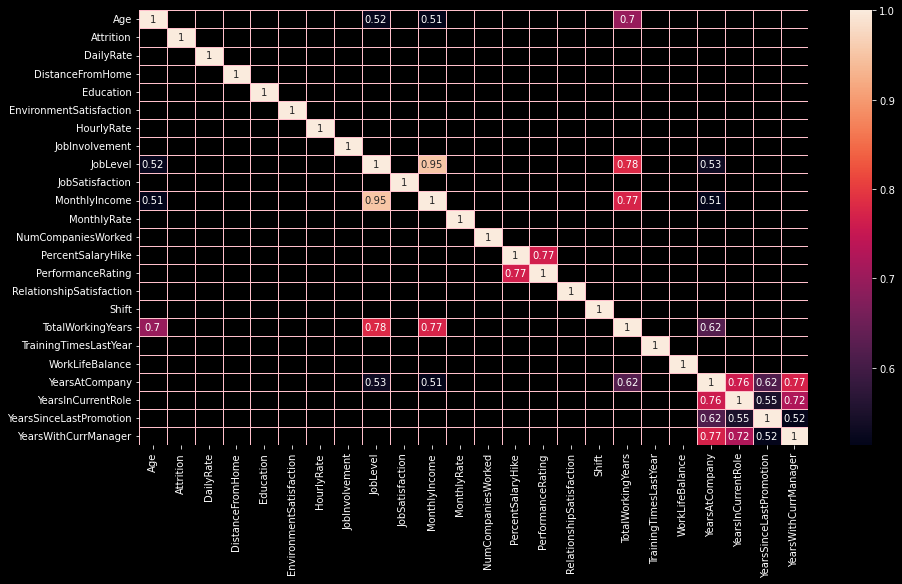

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(Correlation,mask = Correlation < 0.5,annot=True, linewidths=0.5, linecolor='pink')
plt.show()

#### Check the data outliers

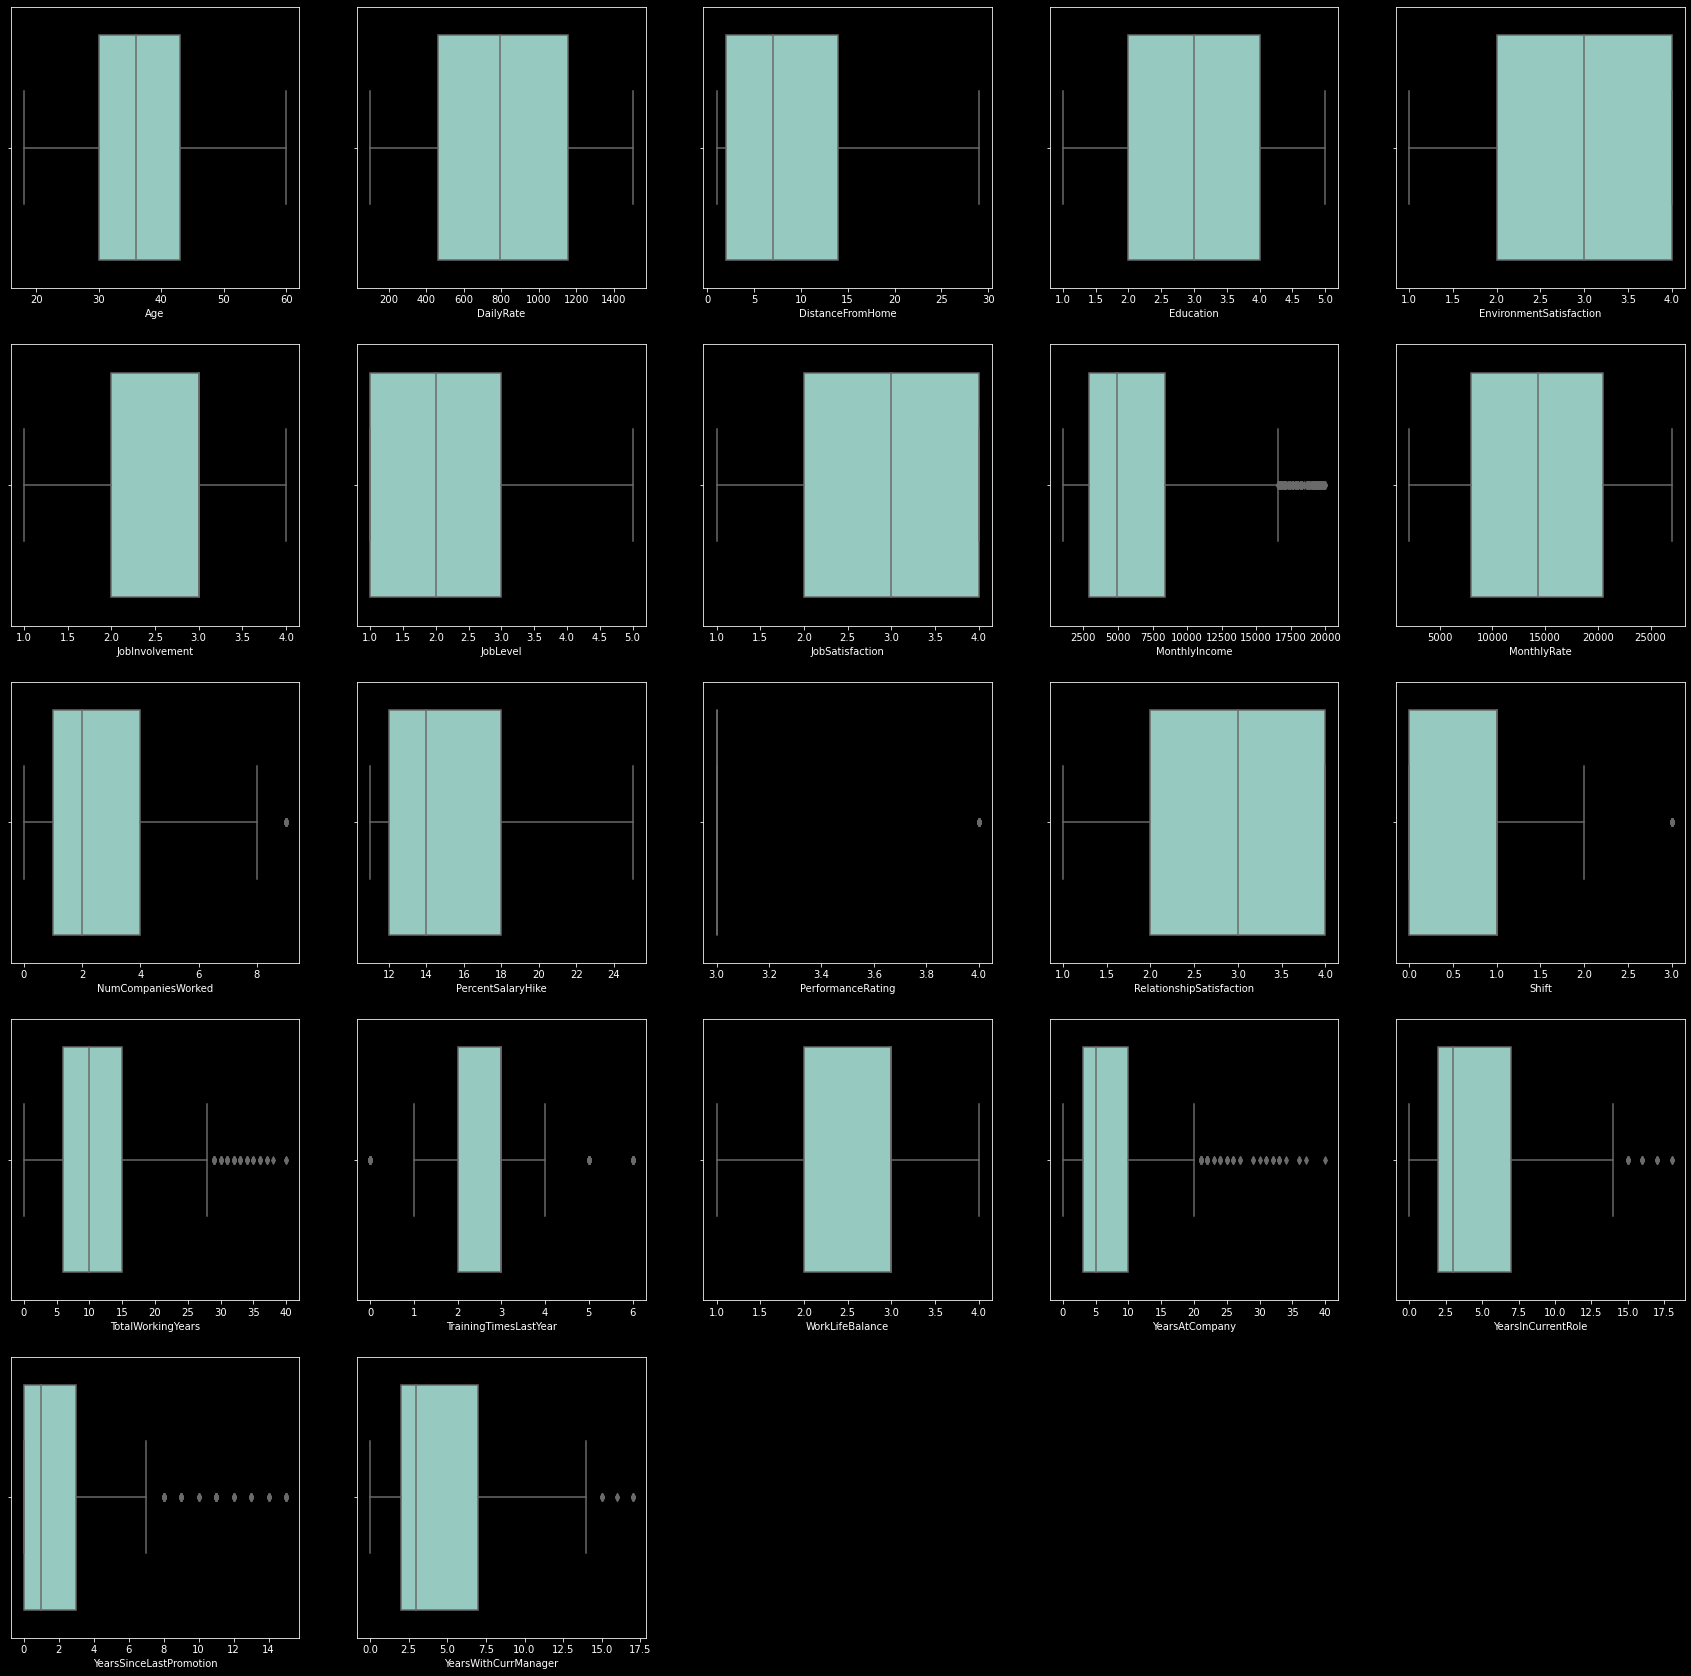

In [23]:
Cols_num_list = Cols_category_list = watson_healthcare.select_dtypes(include = 'int64').columns.to_list()
plt.figure(figsize = (30,30))
sp = 1
for i in Cols_num_list:
    plt.subplot(5,5,sp)
    sns.boxplot(data = watson_healthcare, x = i)
    sp = sp + 1
plt.show()

Comment: We can see there are no missing data, and some variables have outliers but it is not far from the half of data.

#### Remove more columns that have no analysis contribution 

In [24]:
watson_healthcare.drop('PerformanceRating', inplace=True, axis=1)
Cols_num_list.remove('PerformanceRating')

watson_healthcare.drop('MonthlyRate', inplace=True, axis=1)
Cols_num_list.remove('MonthlyRate')

watson_healthcare.drop('DailyRate', inplace=True, axis=1)
Cols_num_list.remove('DailyRate')

#### Using Histogram to check the distribution of numerical columns value

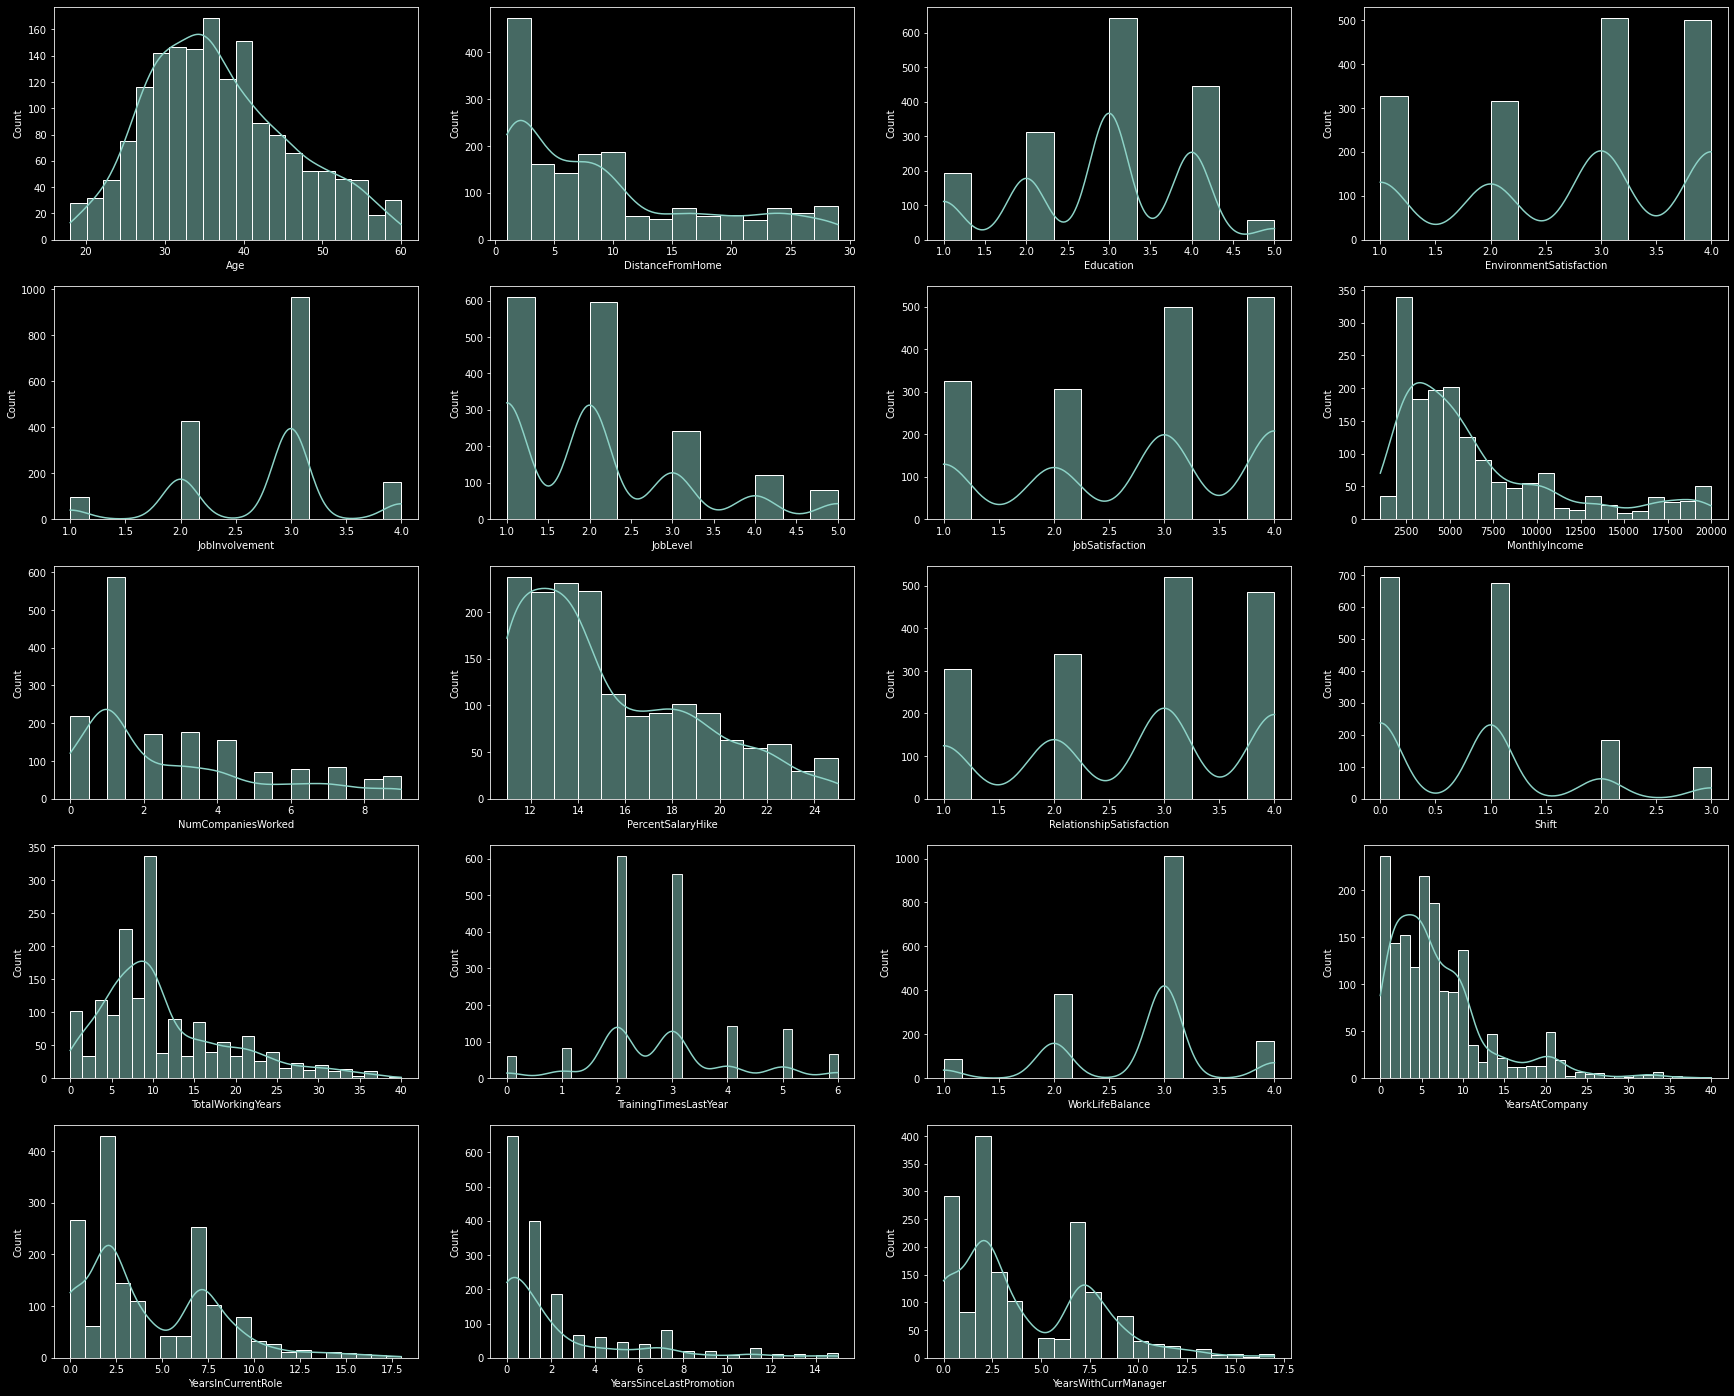

In [25]:
plt.figure(figsize = (30,30))
sp = 1
for i in Cols_num_list:
    plt.subplot(6,4,sp)
    sns.histplot(data = watson_healthcare, x = i, kde=True)
    sp = sp + 1
plt.show()

#### Using Bar to check the distribution of categorical columns value

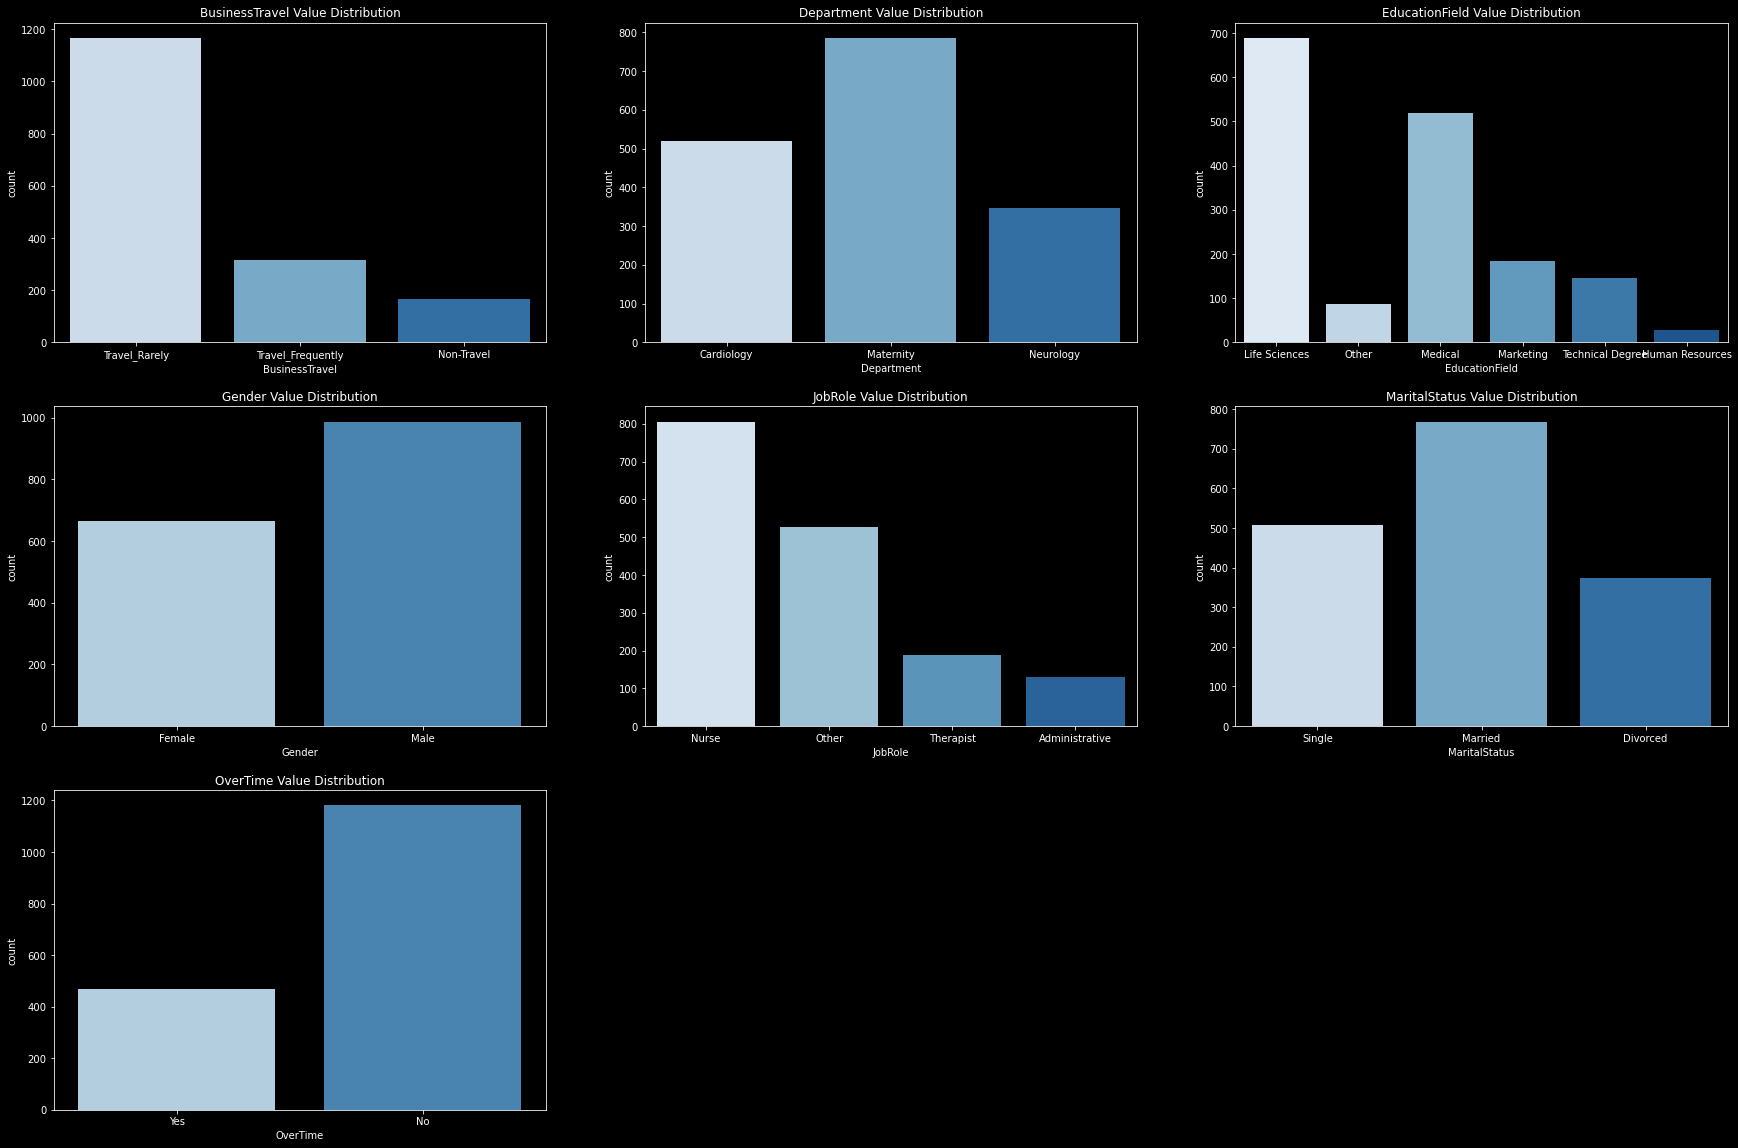

In [26]:
Cols_category_list = watson_healthcare.select_dtypes(include = 'object').columns.to_list()
sp = 1
plt.figure(figsize = (30,20)) 
for i in Cols_category_list:
    plt.subplot(3,3,sp)
    sns.countplot(data = watson_healthcare, x = i, palette='Blues') 
    figureTitle = i + ' Value Distribution'
    plt.title(figureTitle) 
    plt.xticks(fontsize = 10)
    sp = sp + 1
plt.show()

In [27]:
Attrition_yes = watson_healthcare[watson_healthcare['Attrition'] == '1']
Attrition_no = watson_healthcare[watson_healthcare['Attrition'] == '0']

#### Checking correlation between Attrition and Age

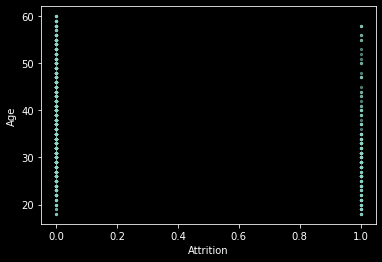

In [28]:
plt.scatter(watson_healthcare['Attrition'], watson_healthcare['Age'], s=5, alpha=0.5)
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

Comment: 
We could see there is no correlation between the two variables.
Therefore, we use another way to see the Attrition happened in each other variables by which spectrums

#### Attrition by Age

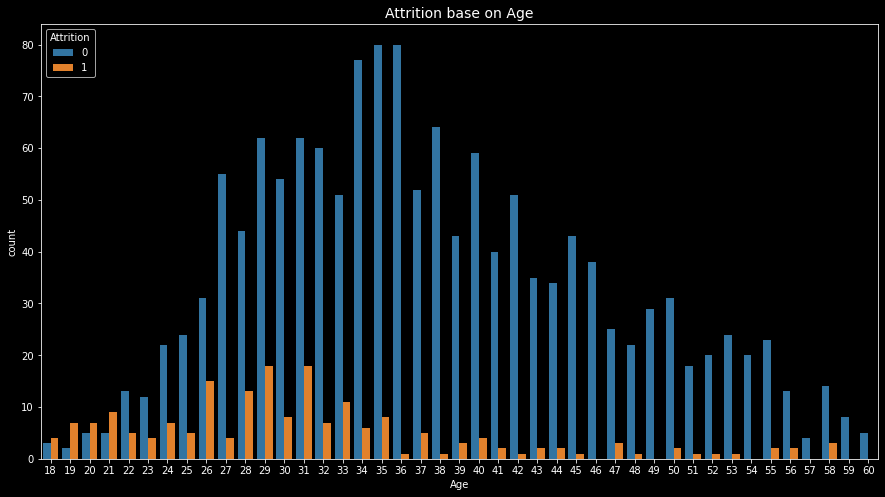

In [29]:
plt.figure(figsize=(15,8))
age_sns = sns.countplot(x='Age', hue='Attrition', data=watson_healthcare, palette='tab10')
plt.title('Attrition base on Age', size = 14)
plt.show()

Comment:
We can see there is high attrition possibility in employees who are at the age of 26 to 33

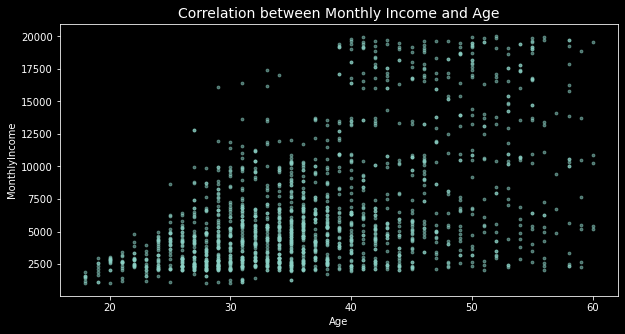

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(watson_healthcare['Age'], watson_healthcare['MonthlyIncome'],
            alpha=0.5, s=8)
plt.title('Correlation between Monthly Income and Age', size = 14)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

There is a moderate correlation between Age and Monthly Income, the older age the employees are the more income they have.

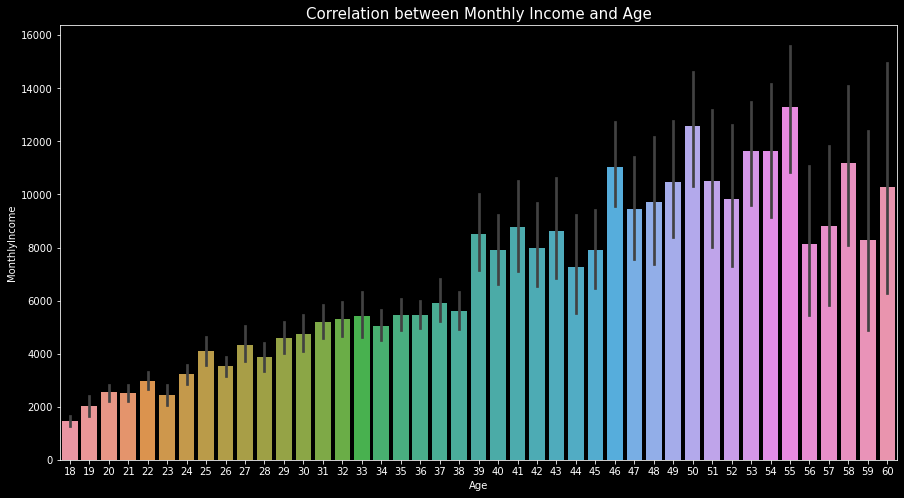

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age', y='MonthlyIncome', data=watson_healthcare, estimator=np.mean)
plt.title('Correlation between Monthly Income and Age', size = 15)
plt.show()

Comment:
We already know that Attrition happened almost in group of employees's age from 26 to 33, in other way we could say that with Monthly Income from $3800 below $5000 are likely at high attrition possibility.

#### Attrition by Monthly Income

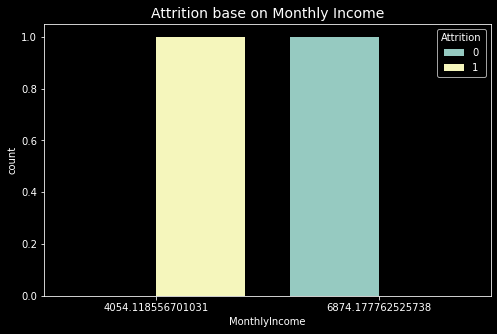

In [32]:
watson_healthcare.groupby('Attrition')['MonthlyIncome'].mean().sort_values().reset_index()
plt.figure(figsize=(8,5))
sns.countplot(x='MonthlyIncome',hue='Attrition',
             data=watson_healthcare.groupby('Attrition')['MonthlyIncome'].mean().sort_values().reset_index(),)
plt.title('Attrition base on Monthly Income', size = 14)
plt.show()

Comment:
The average income which is at the high attrition is $4050 per month.

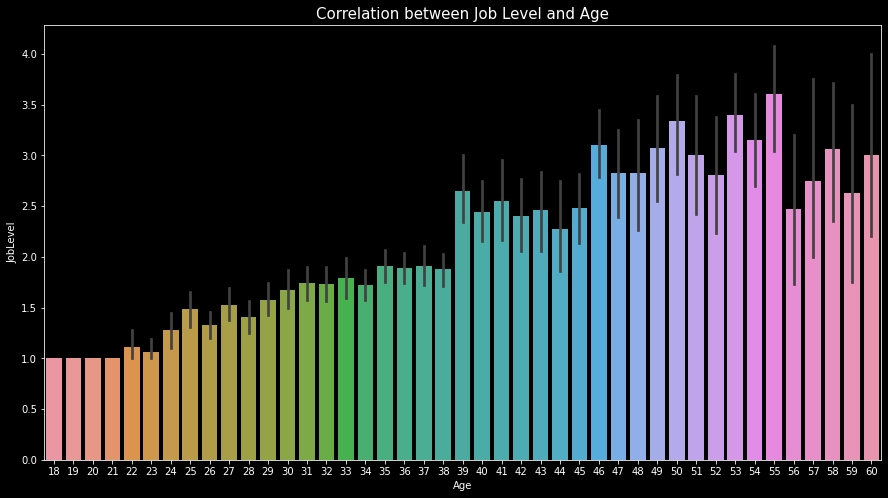

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age',y='JobLevel',data=watson_healthcare)
plt.title('Correlation between Job Level and Age', size = 15)
plt.show()

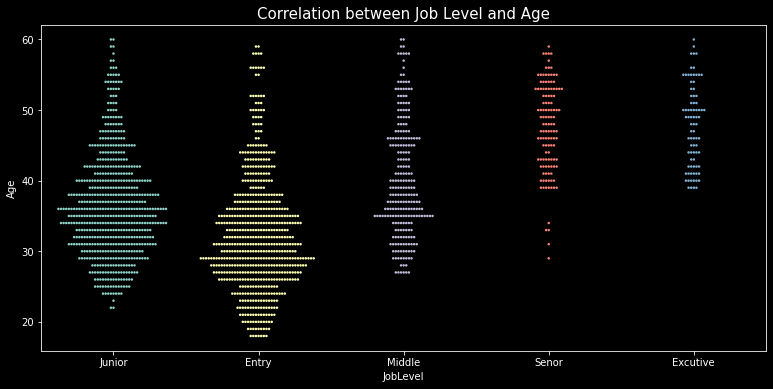

In [34]:
joblevel_dict = {1:'Entry', 2:'Junior', 3:'Middle', 4:'Senor', 5:'Excutive'}
watson_healthcare['JobLevel'] = watson_healthcare['JobLevel'].replace(joblevel_dict)

plt.figure(figsize=(13,6))
sns.swarmplot(x='JobLevel', y='Age', data=watson_healthcare, size=2.5)
plt.title('Correlation between Job Level and Age', size = 15)
plt.show()

The age of high attrition is from 26 to 33, with the Job Qualification as 'Entry' and 'Junior'.

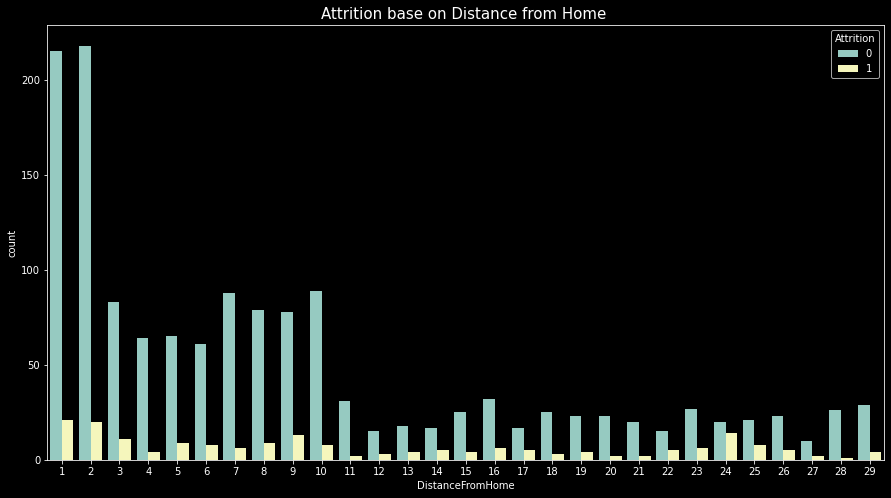

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x='DistanceFromHome',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Distance from Home ', size = 15)
plt.show()

Based on 'Distance from home' factor, we could not draw any connection or could not say that the attrition was affected by Distance from home. there are possibly attritions at any distance of employees locations and their workplaces.

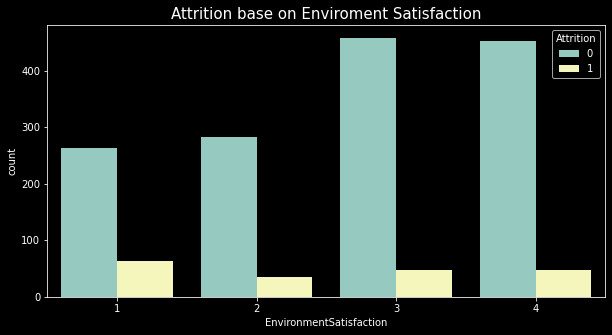

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Enviroment Satisfaction', size = 15)
plt.show()

Comment:
We could see the high rate of Environment Satisfaction the less portion of attrited employees in total

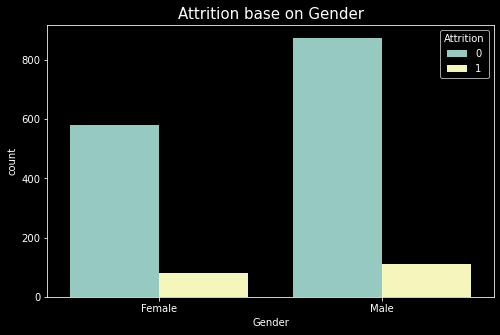

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Gender', size = 15)
plt.show()

Comment: The number of male employees who are attrited person bigger than female counterpart

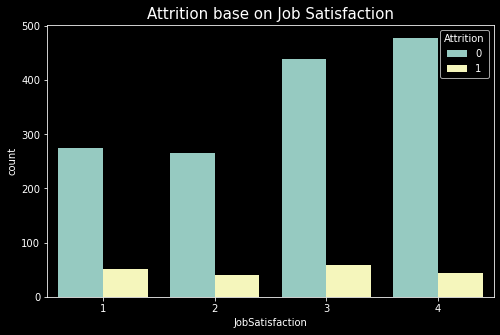

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Job Satisfaction', size = 15)
plt.show()

Comment:
Same as Environment Satisfaction trend, high rate of Job Satisfaction also lead to less portion of attrited employees in total

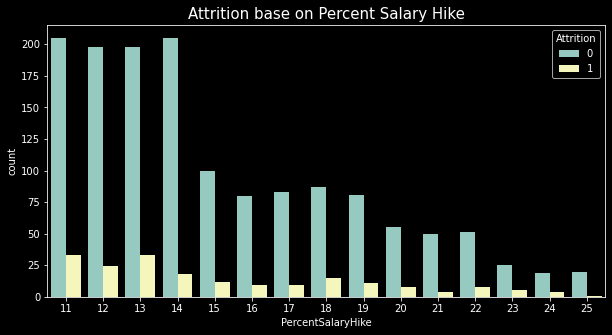

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Percent Salary Hike', size = 15)
plt.show()

Comment:
People who have little increasing which less than 14% compared to their previous yearly salary are also tend to quit job.

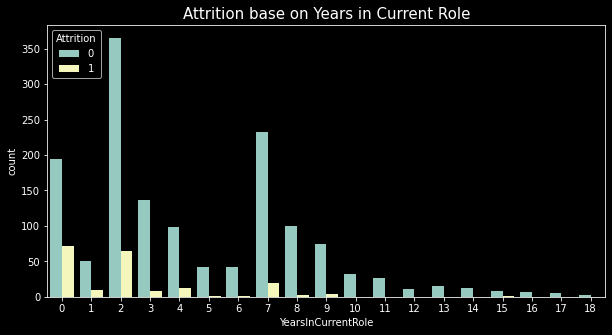

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Years in Current Role', size = 15)
plt.show()

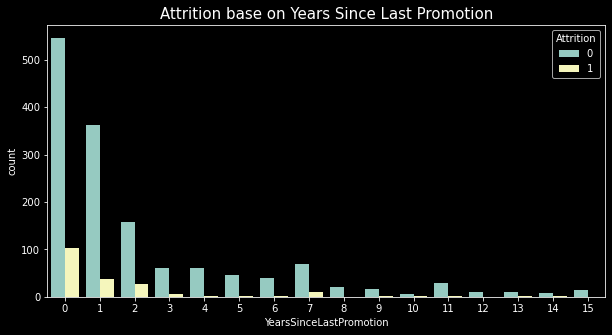

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Years Since Last Promotion', size = 15)
plt.show()

Comment:
Not suprisingly, many attrited employees who have 0 year since Last promotion which mean they havent been promoted before the quit

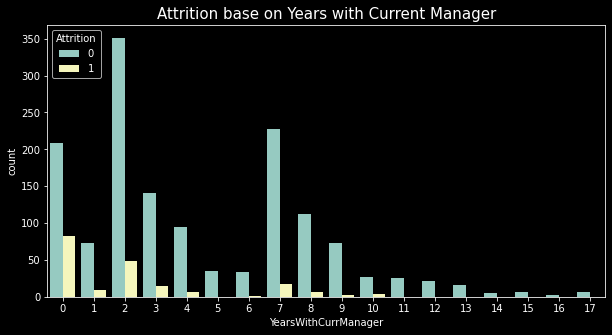

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Years with Current Manager', size = 15)
plt.show()

Attrited Employees also have very short period of time of working with current manager, its range from 0 to 2 years

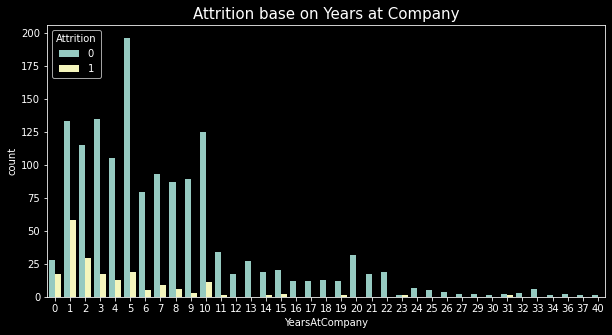

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=watson_healthcare)
plt.title('Attrition base on Years at Company', size = 15)
plt.show()

Years at the company which less than 2 years is also the characteristic of attrited employees

#### Check with factors which have categorical characteristics

In [44]:
plt.figure(figsize=(10,5))
px.histogram(watson_healthcare,x="EducationField",
             color="Attrition",barmode="group", text_auto="True",
             title = "Attrition in Education Field")

<Figure size 720x360 with 0 Axes>

People with background such as Life Science and Medical seem to be in high demand and they frequently to switch job

In [45]:
px.histogram(watson_healthcare,x="Department",color="Attrition",
             barmode="group",text_auto="True",
             title = "Attrition in Department Type")

Maternity Department is where occurs the high level of attrition.

In [46]:
px.histogram(watson_healthcare,x="JobRole",color="Attrition",
             barmode="group", text_auto="True",
             title = "Attrition in Job Role")

There are a significatnt number of attrited staff from Nurse and Other roles. But in the other side, Therapist and Administrative roles are unlikely to quit

### Conclusion: 

We can see from the historical data and could assume that the Attrition based on the below indicators

Age: 26 to 33
Monthly Income: 3800 - 4200 (with 4050 mean)
Job Level: Junior
Job Satisfaction: Low
Environment Satisfaction : Low
Percent Salary Hike: Low, < 15%
Years Since Last Promotion: 0 year
Years In Current Role: 0-2 years
Years At Company : 0-2 years
Background: Medical, Life Science
Department: Maternity, Cardiology
Role: Nurse

An employee who get as many as from these signs is likely at high possibility of attrition